In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
! ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
01-parse_data_bgl.py  feature_importance_example.py  hdfsparser.py  models
bgl.ipynb	      feature_importance.ipynb	     __init__.py    __pycache__
converter.ipynb       feature_importance.py	     logrep	    splitdatabgl.ipynb
extensions	      hdfs.ipynb		     main.py	    splitdatabgl.py


In [ ]:
from models.traditional import SVM
from models.traditional import DecisionTree
from models.traditional import LR
from extensions.stat_ranking import ModelData
from splitdatabgl import split_bgl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [ ]:
data = np.load('../data/BGL/BGL-log.splitted.npz')
train_x = data['x_train']
train_y = data['y_train']
test_x = data['x_test']
test_y = data['y_test']

In [ ]:
event_ids = pd.read_csv('../data/BGL/BGL.event_ids.csv')
event_ids = event_ids.drop(event_ids.columns[0], axis=1)
display(event_ids)

,0
0,01c4e373
1,02430fd4
2,0256fb0b
3,0315e48d
4,0328c31b
...,...
344,fb1560b4
345,fb225cd2
346,fe297487
347,feaae979


In [ ]:
decision_tree = DecisionTree()
decision_tree.fit(train_x, train_y)

====== Model summary ======


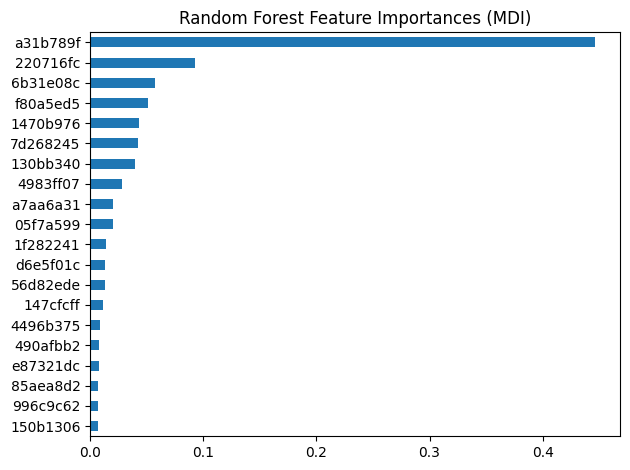

In [19]:
feature_names = event_ids.to_numpy().flatten()

mdi_importances = pd.Series(
    decision_tree.classifier.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax1 = mdi_importances.tail(20).plot.barh()
ax1.set_title("Random Forest Feature Importances (MDI)")
ax1.figure.tight_layout()

In [ ]:
print(mdi_importances.tail(20))

In [ ]:
result = permutation_importance(
    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean).sort_values(ascending=True).tail(20)

fig, ax = plt.subplots()
permutation_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

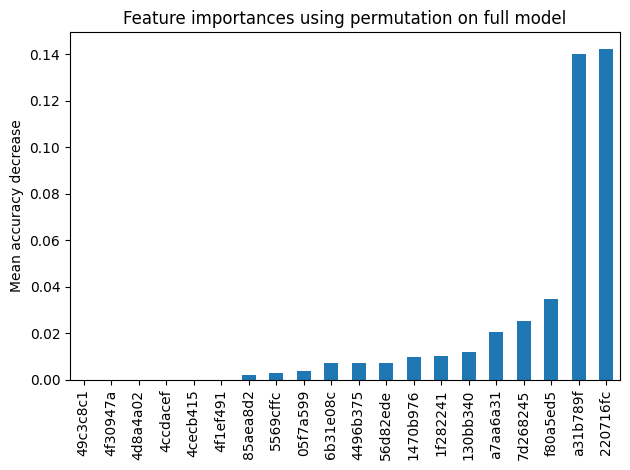

In [31]:
result = permutation_importance(
    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.bar()
ax2.set_title("Feature importances using permutation on full model")
ax2.set_ylabel("Mean accuracy decrease")
ax2.figure.tight_layout()